# Importing the Required Libraries

In [ ]:
import cv2 # for using computer vision related functions
import numpy as np # for numerical computations on 2D image array
import pandas as pd # for dataset preparation for deep learning libraries
import matplotlib.pyplot as plt # for displaying image and plotting graph

In [ ]:
def gaussian_filter(img, mask_size = 5, sigma = 2):
  offset = mask_size // 2
  x, y = np.meshgrid(range(-offset, offset + 1), range(-offset, offset + 1))
  gauss_filter = np.exp(-((x ** 2 + y ** 2) / (2 * sigma ** 2)))
  gauss_filter /= gauss_filter.sum()
  return cv2.filter2D(src = img, ddepth = -1, kernel = gauss_filter)

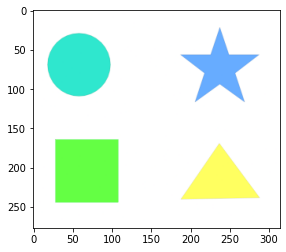

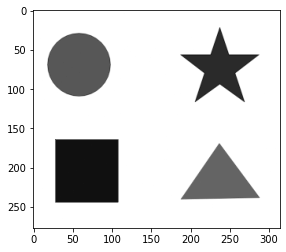

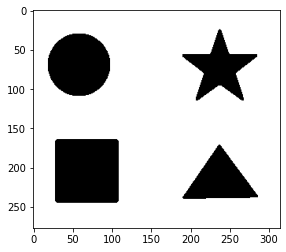

In [ ]:
img = cv2.imread("/content/drive/MyDrive/sem 8/CV/processed_shapes/shapes.png")
orig_img = img.copy()
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
threshed_img = cv2.threshold(gaussian_filter(gray, mask_size = 5, sigma = 10), 0, 1, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]

plt.imshow(img), plt.show();
plt.imshow(gray, cmap = 'gray'), plt.show();
plt.imshow(threshed_img, cmap = 'binary_r'), plt.show();

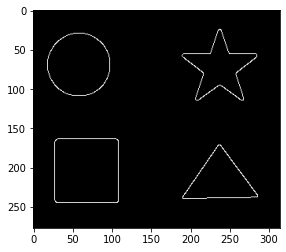

In [ ]:
edges = cv2.Canny(threshed_img, 0.2, 0.8)
plt.imshow(edges, cmap = 'gray');

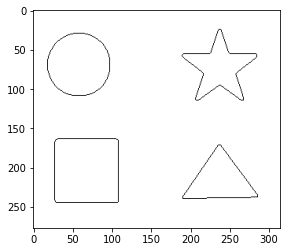

In [ ]:
contours, hierarchy = cv2.findContours(edges.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
blank = np.zeros(threshed_img.shape)

cv2.drawContours(blank, contours, -1, (255,0,0), 1)
plt.imshow(blank, cmap = 'binary');

In [ ]:
# the different classes of our shapes
categories = ["circle", "square", "star", "triangle"]

In [ ]:
# !pip install cPickle
import _pickle as cPickle

# load the gaussian model again
with open('/content/drive/MyDrive/sem 8/CV/processed_shapes/gauss-without-lda.pkl', 'rb') as fid:
    clf_loaded = cPickle.load(fid)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  "X does not have valid feature names, but"


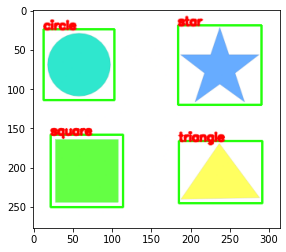

In [ ]:
# obtaining the bounding box, extracting and saving the ROI (region of interest) font
font = cv2.FONT_HERSHEY_SIMPLEX
  
# org
org = (50, 50)
  
# fontScale
fontScale = 0.5
   
# Blue color in BGR
color = (255, 0, 0)
  
# Line thickness of 2 px
thickness = 2

ROI_number = 0
img = orig_img.copy()

for c in contours:
    offset = 5
    x,y,w,h = cv2.boundingRect(c)
    x = x-offset
    y = y-offset
    w += 2*offset
    h += 2*offset
    cv2.rectangle(img, (x, y), (x + w, y + h), (36,255,12), 2)
    ROI = cv2.resize(blank[y:y+h, x:x+w], (25,25), interpolation = cv2.INTER_AREA)
    thres, ROI_thresh = cv2.threshold(ROI, 50, 255, cv2.THRESH_BINARY);
    ROI_thresh = ROI_thresh/ROI_thresh.max()
    pred = clf_loaded.predict([ROI_thresh.flatten()])
    cv2.putText(img, categories[pred[0]], (x, y), font, 
                   fontScale, color, thickness, cv2.LINE_AA)

plt.imshow(img);